# Yelp Sentiment Analysis

## Introduction

#### Background

Briefly introduce the importance of sentiment analysis in understanding customer opinions.

Explain why Yelp reviews are valuable for businesses and consumers.

Talk about data source, which dataset you plan to use, and why. Talk about implications of a limiting scope (100K data)

#### Objectives 

Clearly state the goals of your sentiment analysis project on Yelp reviews.

Specify positive sentiment analysis


## Data Preprocessing

#### Loading packages

In [21]:
# Imports
import json
import typing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

#### Setting work directory 

In [2]:
import os
# Set a new working directory
new_directory = "/Users/thuyduongle/DATA 5100/Yelp Dataset"
os.chdir(new_directory)

# Verify the change in working directory
updated_directory = os.getcwd()
print("Updated Working Directory:", updated_directory)

Updated Working Directory: /Users/thuyduongle/DATA 5100/Yelp Dataset


#### Setting file path

In [3]:
# Specify the file path for the business dataset
business_path = "yelp_academic_dataset_business.json"
# Specify the file path for the review dataset
review_path = "yelp_academic_dataset_review.json"


#### Loading data

In [4]:
# Loading the business dataset
business = pd.read_json(business_path, lines=True, nrows=100000)
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [5]:
# Specify the columns to keep
business_keep_columns = ['business_id', 'name', 'city', 'state', 'categories']

# Keep only the specified columns and drop rows with missing values
business = business[business_keep_columns].dropna()
business.head()

,business_id,name,city,state,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",Santa Barbara,CA,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,Affton,MO,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,Tucson,AZ,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,Green Lane,PA,"Brewpubs, Breweries, Food"


In [6]:
# Loading the reviews dataset
reviews = pd.read_json(review_path, lines=True, nrows=100000)
reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [7]:
# Specify the columns to keep
review_keep_columns = ['business_id', 'stars', 'text']

# Keep only the specified columns and drop rows with missing values
reviews = reviews[review_keep_columns].dropna()
reviews.head()

,business_id,stars,text
0,XQfwVwDr-v0ZS3_CbbE5Xw,3,"If you decide to eat here, just be aware it is..."
1,7ATYjTIgM3jUlt4UM3IypQ,5,I've taken a lot of spin classes over the year...
2,YjUWPpI6HXG530lwP-fb2A,3,Family diner. Had the buffet. Eclectic assortm...
3,kxX2SOes4o-D3ZQBkiMRfA,5,"Wow! Yummy, different, delicious. Our favo..."
4,e4Vwtrqf-wpJfwesgvdgxQ,4,Cute interior and owner (?) gave us tour of up...


#### Merging two datasets 

In [8]:
# business_id is the common key 
# Perform an outer join
df = business.merge(reviews, on='business_id', how='outer')

# Display the resulting DataFrame
print(df)

                   business_id                      name           city state  \
0       Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ  Santa Barbara    CA   
1       mpf3x-BjTdTEA3yCZrAYPw             The UPS Store         Affton    MO   
2       mpf3x-BjTdTEA3yCZrAYPw             The UPS Store         Affton    MO   
3       mpf3x-BjTdTEA3yCZrAYPw             The UPS Store         Affton    MO   
4       tUFrWirKiKi_TAnsVWINQQ                    Target         Tucson    AZ   
...                        ...                       ...            ...   ...   
189956  6bhEQ4Y3qAJuMxy1xpdJnA  Duncan Family Healthcare           Reno    NV   
189957  ZERQMWb1PFzCfbfknqq-fA                       NaN            NaN   NaN   
189958  9QoKKDZB_YuDeS5TxRW8bg                       NaN            NaN   NaN   
189959  9QoKKDZB_YuDeS5TxRW8bg                       NaN            NaN   NaN   
189960  mKxCNYEoKt6d_1rXmvRwww                       NaN            NaN   NaN   

                           

#### Filtering the data

##### Filtering for restaurants

In [13]:
# Filtering for restaurants
df = df[df['categories'].str.contains('Restaurant', case=False, na=False)]

##### Filtering NA values 

In [12]:
# Filtering NA values where there isn't a review
df = df.dropna(subset=['text'])

## Exploratory Data Analysis 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72125 entries, 6 to 105049
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   business_id  72125 non-null  object 
 1   name         72125 non-null  object 
 2   city         72125 non-null  object 
 3   state        72125 non-null  object 
 4   categories   72125 non-null  object 
 5   stars        72125 non-null  float64
 6   text         72125 non-null  object 
dtypes: float64(1), object(6)
memory usage: 4.4+ MB


Review Length Statistics:
count    72125.000000
mean       537.317241
std        496.437899
min          3.000000
25%        218.000000
50%        382.000000
75%        679.000000
max       5000.000000
Name: text, dtype: float64


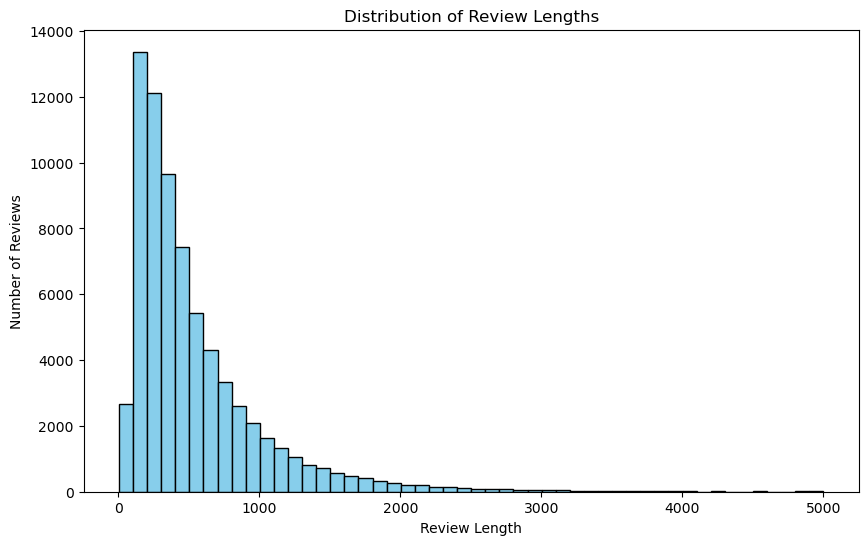

In [18]:
review_length = df['text'].apply(len)

# Display statistics about review lengths
print("Review Length Statistics:")
print(review_length.describe())

# Create a histogram to visualize the distribution of review lengths
plt.figure(figsize=(10, 6))
plt.hist(review_length, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')
plt.show()


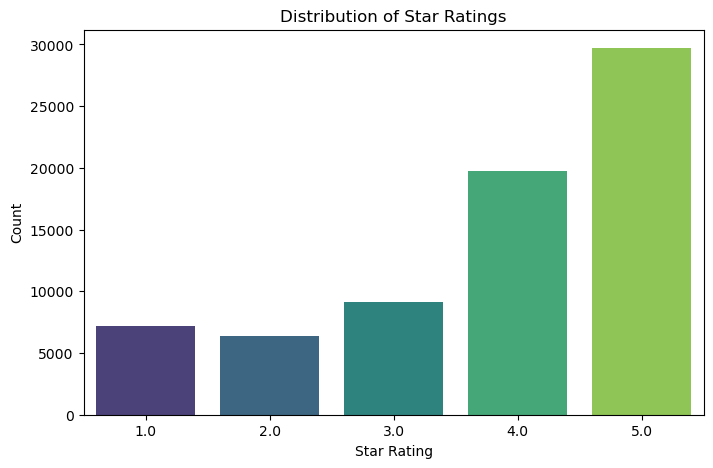

In [22]:
# Distribution of Stars
plt.figure(figsize=(8, 5))
sns.countplot(x='stars', data=df, palette='viridis')
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()

Top States with the Highest Number of 5-Star Reviews:
state
PA    7167
FL    4792
LA    4334
TN    2971
MO    2251
Name: count, dtype: int64


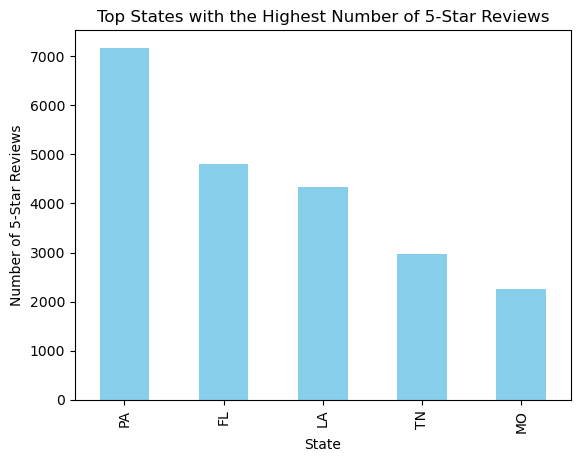

In [36]:
# Assuming your DataFrame is named 'df'
# Filter 5-star reviews
five_star_reviews = df[df['stars'] == 5]

# Count the number of 5-star reviews by state
top_states_5_star_reviews = five_star_reviews['state'].value_counts().head(5)

print("Top States with the Highest Number of 5-Star Reviews:")
print(top_states_5_star_reviews)

# Plot the bar chart
top_states_5_star_reviews.plot(kind='bar', color='skyblue')
plt.title('Top States with the Highest Number of 5-Star Reviews')
plt.xlabel('State')
plt.ylabel('Number of 5-Star Reviews')
plt.show()

## Sentiment Analysis Model

### Random Forest

Brief discussion on model, why we've chosen it

##### Step 1: Data Preprocessing

Creating binary sentiment labels based on the stars column. If the star rating is 4 or above, we consider it a positive sentiment (1). Otherwise, it's negative (0)

In [26]:
# Create binary sentiment labels (positive=1, negative=0)
df['sentiment'] = (df['stars'] >= 4).astype(int)

##### Step 2: Train-Test Split

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

##### Step 3: Text Vectorization (TF-IDF)

We use the TF-IDF vectorizer to convert the text data into numerical features. TF-IDF represents the importance of each word in the context of the entire dataset. 

max_features, or the number of words to consider, is currently set at 5000. This is adjustable based on our need. 

In [28]:
# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  

# Transform the training and testing text data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

##### Step 4: Model Creation and Training (Random Forest Classifier)

We create a random forest classifier with 100 decision trees.

In [29]:
# Create and train a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

##### Step 5: Model Prediction and Evaluation

In [30]:
# Make predictions on the testing set
predictions = rf_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.66      0.76      4467
           1       0.86      0.97      0.91      9958

    accuracy                           0.87     14425
   macro avg       0.88      0.81      0.83     14425
weighted avg       0.87      0.87      0.86     14425



##### Step 6: Feature Importance

Random forests provide feature importances, indicating the contribution of each feature (word) to the model's predictions. We extract and print the top words indicative of exceptional restaurants based on their feature importances. 

In [31]:
# Feature importances (words indicative of exceptional restaurants)
feature_importances = pd.Series(rf_classifier.feature_importances_, index=tfidf_vectorizer.get_feature_names_out())
top_words_indicative_of_exceptional = feature_importances.sort_values(ascending=False).head(10)
print("Top Words Indicative of Exceptional Restaurants:")
print(top_words_indicative_of_exceptional)


Top Words Indicative of Exceptional Restaurants:
not          0.020856
great        0.017582
delicious    0.013036
ok           0.009758
amazing      0.009505
worst        0.008990
but          0.008415
no           0.008256
was          0.008211
and          0.008143
dtype: float64


## Summary of Findings


2.2 Data Exploration
Display some exploratory data analysis (EDA) visualizations to give an overview of the dataset.
Highlight any interesting patterns or trends observed during the exploration.
3. Preprocessing:
3.1 Text Cleaning
Discuss the steps taken to clean and preprocess the text data (e.g., removing stopwords, punctuation, stemming/lemmatization).
3.2 Feature Extraction
Explain the methods used to convert the text data into numerical features (e.g., TF-IDF, word embeddings).
4. Sentiment Analysis Model:
4.1 Model Selection
Choose a sentiment analysis model suitable for your task (e.g., machine learning, deep learning).
Provide a brief rationale for your choice.
4.2 Training
Describe the training process, including the splitting of the dataset into training and validation sets.
Present key metrics used to evaluate the model's performance during training.
5. Results:
5.1 Evaluation Metrics
Report the evaluation metrics used to assess the model's performance (e.g., accuracy, precision, recall, F1-score).
5.2 Model Performance
Present the overall performance of your sentiment analysis model on the test dataset.
Include any insights gained from analyzing misclassifications.
5.3 Visualizations
Use visualizations (e.g., confusion matrix, ROC curve) to enhance the understanding of your model's performance.
6. Conclusion:
6.1 Summary
Summarize the main findings and results of your sentiment analysis project.
6.2 Limitations
Discuss any limitations of your approach and potential areas for improvement.
6.3 Future Work
Suggest possible directions for future research or enhancements to the sentiment analysis model.
7. References:
Include citations for any datasets, libraries, or algorithms used in your project.
Remember to adjust the details based on the specifics of your project and the depth of analysis you plan to undertake. Good luck with your sentiment analysis project!